Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [106]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(filename):
    with open(filename, 'rb') as f:
        return list(unicodecsv.DictReader(f))

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')




In [107]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

enrollments[0],daily_engagement[0],project_submissions[0]


({u'account_key': u'448',
  u'cancel_date': u'2015-01-14',
  u'days_to_cancel': u'65',
  u'is_canceled': u'True',
  u'is_udacity': u'True',
  u'join_date': u'2014-11-10',
  u'status': u'canceled'},
 {u'acct': u'0',
  u'lessons_completed': u'0.0',
  u'num_courses_visited': u'1.0',
  u'projects_completed': u'0.0',
  u'total_minutes_visited': u'11.6793745',
  u'utc_date': u'2015-01-09'},
 {u'account_key': u'256',
  u'assigned_rating': u'UNGRADED',
  u'completion_date': u'2015-01-16',
  u'creation_date': u'2015-01-14',
  u'lesson_key': u'3176718735',
  u'processing_state': u'EVALUATED'})

In [108]:
len(enrollments), len(daily_engagement), len(project_submissions)
# The 3 should have same unique account_key

(1640, 136240, 3642)

### Problems in enrolments: 
              - account_key should be string, no need to be modified
              - days_to_cancel should be integer
              - is_canceled and is_udacity should be boolean
              - join_date should be datetime
              - status should be string, no need to be modified

### Problems in daily_engagement
              - account_key should be string, no need to be modified
              - lessons_completed should be integer
              - num_courses_visited and projects_completed should be integer
              - total_minutes_visited should be float
              - utc_date should be datetime

### Problems in project_submissions
              - account_key and assigned_rating should be string, no need to be modified
              - completion_date should be date time
              - creation_date should be date time
              - lesson_key and processing_state should be string, no need to be modified



## Fixing Data Types

In [109]:

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None

## So I need functions to:
### 1. convert string to date time
from datetime import datetime as dt

def string_to_dateTime(date_string):
    if date_string is None or date_string == '':
        return None
    else:
        return dt.strptime(date_string, '%Y-%m-%d')

### 2. convert string to integers
def string_to_integer(int_string):
    if int_string == '':
        return None
    else:
        return int(float(int_string))
    
    
### 3. convert string to boolean
### can be done later


### 4. convert string to float
def string_to_float(float_string):
    if float_string is '':
        return None
    else:
        return float(float_string)



In [110]:
# Clean up the data types in the enrollments table


### Problems in enrolments: 
###              - account_key should be string, no need to be modified
###              - days_to_cancel should be integer
###              - is_canceled and is udacity should be boolean
###              - join_date should be datetime
###              - status should be string, no need to be modified

for enrollment in enrollments:
    enrollment['days_to_cancel'] = string_to_integer(enrollment['days_to_cancel'])
    enrollment['cancel_date'] = string_to_dateTime(enrollment['cancel_date'])
    enrollment['is_canceled'] = (enrollment['is_canceled']=='True')
    enrollment['is_udacity'] = (enrollment['is_udacity']=='True')
    enrollment['join_date'] = string_to_dateTime(enrollment['join_date'])

enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [111]:
# Clean up the data types in the engagement table

### Problems in daily_engagement
###              - account_key should be string, no need to be modified
###              - lessons_completed should be integer
###              - num_courses_visited and projects_completed should be integer
###              - total_minutes_visited should be float
###              - utc_date should be datetime

for engagement in daily_engagement:
    engagement['lessons_completed'] = string_to_integer(engagement['lessons_completed'])
    engagement['num_courses_visited'] = string_to_integer(engagement['num_courses_visited'])
    engagement['total_minutes_visited'] = string_to_float(engagement['total_minutes_visited'])
    engagement['utc_date'] = string_to_dateTime(engagement['utc_date'])

    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': u'0.0',
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [112]:
# Clean up the data types in the submissions table

### Problems in project_submissions
###              - account_key and assigned_rating should be string, no need to be modified
###              - completion_date should be date time
###              - creation_date should be date time
###              - lesson_key and processing_state should be string, no need to be modified

for submission in project_submissions:
    submission['completion_date'] = string_to_dateTime(submission['completion_date'])
    submission['creation_date']   = string_to_dateTime(submission['creation_date'])
    
project_submissions[0]


{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [21]:
for engagement in daily_engagement:
    engagement[u'account_key'] = engagement.pop(u'acct')

daily_engagement[0]

{u'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': u'0.0',
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [22]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def num_of_rows(data):
    return len(data)

def count_of_unique(data, key):
    temp = set()
    for datapoint in data:
        if datapoint[key] not in temp:
            temp.add(datapoint[key])
    return len(temp)


### unique account in enrollments
print('Enrollments Table:\n')
print('Number of rows: %s' % num_of_rows(enrollments))
print('Number of unique students: %s' %count_of_unique(enrollments,'account_key'))
print('--------------------------------------')

### in daily_engagement
print('Daily Engagement Table:\n')
print('Number of rows: %s' % num_of_rows(daily_engagement))
print('Number of unique students: %s' %count_of_unique(daily_engagement,'account_key'))
print('--------------------------------------')

### in submission
print('Project Submissions Table:\n')
print('Number of rows: %s' % num_of_rows(project_submissions))
print('Number of unique students: %s' %count_of_unique(project_submissions,'account_key'))


Enrollments Table:

Number of rows: 1640
Number of unique students: 1302
--------------------------------------
Daily Engagement Table:

Number of rows: 136240
Number of unique students: 1237
--------------------------------------
Project Submissions Table:

Number of rows: 3642
Number of unique students: 743


## Problems in the Data

In [23]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
# Done above

## Missing Engagement Records

In [24]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

def set_of_unique_value(lst, key):
    return set([item[key] for item in lst])

unique_student_de = set_of_unique_value(daily_engagement, 'account_key')
missing_student = []

for enrollment in enrollments:
    student_enroll = enrollment['account_key']
    if student_enroll not in unique_student_de:
        missing_student.append(enrollment)

missing_student[1]


{u'account_key': u'871',
 u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0),
 u'days_to_cancel': 0,
 u'is_canceled': True,
 u'is_udacity': False,
 u'join_date': datetime.datetime(2014, 11, 13, 0, 0),
 u'status': u'canceled'}

## Checking for More Problem Records

In [25]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

## Because above missing student also include enroll and cancel in same date (no engagement), 
## They are actually not the missing student, here I modify the code to exclude such case

missing_student = []

for enrollment in enrollments:
    student_enroll = enrollment['account_key']
    if (student_enroll not in unique_student_de) and (enrollment['cancel_date'] != enrollment['join_date']):
        missing_student.append(enrollment)

missing_student



[{u'account_key': u'1304',
  u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0),
  u'days_to_cancel': 59,
  u'is_canceled': True,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 1, 10, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'1304',
  u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0),
  u'days_to_cancel': 99,
  u'is_canceled': True,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 3, 10, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'1101',
  u'cancel_date': None,
  u'days_to_cancel': None,
  u'is_canceled': False,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 2, 25, 0, 0),
  u'status': u'current'}]

Only 3 accounts are suprising datapoints, notice all of them have value: 'is_udacity == True' 

## Tracking Down the Remaining Problems

In [26]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set([item['account_key'] for item in enrollments if item['is_udacity']])
udacity_test_accounts

{u'1069', u'1101', u'1304', u'312', u'448', u'818'}

In [27]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts

def remove_udacity_account(data):
    non_udacity_data = []
    for datapoint in data:
        if datapoint['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(datapoint)
    return non_udacity_data

# Remove Udacity test accounts from all three tables
no_ud_enrollments = remove_udacity_account(enrollments)
no_ud_engagements = remove_udacity_account(daily_engagement)
no_ud_submissions = remove_udacity_account(project_submissions)



In [28]:
len(no_ud_enrollments), len(no_ud_engagements), len(no_ud_submissions)


(1622, 135656, 3634)

## Refining the Question

In [29]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in no_ud_enrollments:
    
    if (not enrollment['is_canceled']) or enrollment['days_to_cancel'] > 7:
        key = enrollment['account_key']
        enroll_date = enrollment['join_date']
        
        if key not in paid_students or enroll_date > paid_students[key]:
            paid_students[key] = enroll_date
len(paid_students)




995

## Getting Data from First Week

In [30]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.


def within_one_week(join_date, engage_date):
    return 0 <= (engage_date - join_date).days < 7

In [31]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.


def opt_in_paid(data):
    paid_and_in_data = []

    for item in data:
        account_key = item['account_key']
        if account_key in paid_students:
            paid_and_in_data.append(item)
    return paid_and_in_data

paid_engagements = opt_in_paid(no_ud_engagements)
paid_engagements_in_first_week = []

for engagement in paid_engagements:
    student = engagement['account_key']
    if student in paid_students and within_one_week(paid_students[student],engagement['utc_date']):
        paid_engagements_in_first_week.append(engagement)


len(paid_engagements_in_first_week)

6919

## Exploring Student Engagement

In [32]:

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

student_engagements = {}

for engagement in paid_engagements_in_first_week:
    
    key = engagement['account_key']
    
    if student_engagements.has_key(key):
        student_engagements[key].append(engagement)
    else:
        student_engagements[key] = [engagement]

    
student_engagements

{u'0': [{u'account_key': u'0',
   u'lessons_completed': 0,
   u'num_courses_visited': 1,
   u'projects_completed': u'0.0',
   u'total_minutes_visited': 11.6793745,
   u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)},
  {u'account_key': u'0',
   u'lessons_completed': 0,
   u'num_courses_visited': 2,
   u'projects_completed': u'0.0',
   u'total_minutes_visited': 37.2848873333,
   u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)},
  {u'account_key': u'0',
   u'lessons_completed': 0,
   u'num_courses_visited': 2,
   u'projects_completed': u'0.0',
   u'total_minutes_visited': 53.6337463333,
   u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)},
  {u'account_key': u'0',
   u'lessons_completed': 0,
   u'num_courses_visited': 1,
   u'projects_completed': u'0.0',
   u'total_minutes_visited': 33.4892696667,
   u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)},
  {u'account_key': u'0',
   u'lessons_completed': 0,
   u'num_courses_visited': 1,
   u'projects_completed': u'0.0',
   u'total_minute

In [33]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)


student_minutes = {}

for student, engages in student_engagements.items():
    total_min = 0
    for engage in engages:
        total_min += engage['total_minutes_visited']
    student_minutes[student] = total_min

student_minutes

{u'0': 494.88049616599994,
 u'1': 18.576384666670002,
 u'10': 130.12347833367,
 u'100': 145.70615016660003,
 u'1000': 180.025886167,
 u'1001': 16.2005246667,
 u'1002': 8.1809285,
 u'1007': 0.0,
 u'1009': 0.0,
 u'101': 148.7306783333,
 u'1011': 118.71332966671,
 u'1013': 4.3800225,
 u'1014': 619.9953998326,
 u'1015': 38.87817050003,
 u'1019': 75.87298200000001,
 u'102': 277.0299235,
 u'1022': 0.0,
 u'1028': 18.8601366667,
 u'1029': 3.50885666667,
 u'103': 1075.0625133337,
 u'1030': 218.55650866673005,
 u'1031': 11.741084,
 u'1032': 13.899305166700001,
 u'1033': 959.9534376661,
 u'1036': 0.0,
 u'1038': 0.0,
 u'104': 839.123771167,
 u'1040': 12.9824898333,
 u'1042': 45.5670335,
 u'1048': 0.0,
 u'1049': 37.853095,
 u'105': 312.1800340007,
 u'1050': 84.5200338333,
 u'1052': 117.195806333,
 u'1053': 81.4415533333,
 u'1054': 0.0,
 u'1055': 71.5736406667,
 u'1056': 366.5285674997,
 u'1058': 0.0,
 u'106': 29.0687406666,
 u'1060': 1768.5227493319999,
 u'1062': 366.3194163334,
 u'1066': 0.0,
 u'1

In [34]:
import numpy as np

# Summarize the data about minutes spent in the classroom

def summarize_data(data):
    print('Mean    : %s' % np.mean(data))
    print('Std.Dev : %s' % np.std(data))
    print('Max     : %s' % np.max(data))
    print('Min     : %s' % np.min(data))

summarize_data(student_minutes.values())


Mean    : 306.708326753
Std.Dev : 412.996933409
Max     : 3564.7332645
Min     : 0.0


## Debugging Data Analysis Code

In [35]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

# Done already



In [86]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def group_data(data, key):
    
    student_engagements = {}
    
    for datapoint in data:

        key_temp = datapoint[key]
        if student_engagements.has_key(key_temp):
            student_engagements[key_temp].append(datapoint)
        else:
            student_engagements[key_temp] = [datapoint]
    return student_engagements



def sum_grouped_data(data, field):
    student_data = {}

    for student, engages in data.items():
        total = 0
        for engage in engages:
            if engage.has_key(field):
                total += engage[field]
        student_data[student] = total

    return student_data




In [87]:
engagement_by_account = group_data(paid_engagements_in_first_week,
                                   'account_key')

In [88]:
total_minutes_by_account = sum_grouped_data(engagement_by_account, 'total_minutes_visited')


In [89]:
summarize_data(total_minutes_by_account.values())

Mean    : 306.708326753
Std.Dev : 412.996933409
Max     : 3564.7332645
Min     : 0.0


## Lessons Completed in First Week

In [114]:
total_lessons_by_account = sum_grouped_data(engagement_by_account, 'lessons_completed')
summarize_data(total_lessons_by_account.values())

Mean    : 1.63618090452
Std.Dev : 3.00256129983
Max     : 36
Min     : 0


## Number of Visits in First Week

In [90]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for item in paid_engagements_in_first_week:
    item['has_visited'] = (item['num_courses_visited'] > 0)

engagement_by_account = group_data(paid_engagements_in_first_week,
                                   'account_key')

days_visited_by_account = sum_grouped_data(engagement_by_account,
                                            'has_visited')
summarize_data(days_visited_by_account.values())


Mean    : 2.86733668342
Std.Dev : 2.25519800292
Max     : 7
Min     : 0


## Splitting out Passing Students

In [120]:
paid_submission = opt_in_paid(no_ud_submissions)


In [123]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

paid_submission_set = set()
subway_project_lesson_keys = ['746169184', '3176718735']

for submission in paid_submission:
    lesson = submission['lesson_key']
    rate = submission['assigned_rating']
    
    if (lesson in subway_project_lesson_keys and (rate == 'PASSED' or rate == 'DISTINCTION')):
        paid_submission_set.add(submission['account_key'])

passing_engagement = []
non_passing_engagement = []


for engagement in paid_engagements_in_first_week:
    if engagement['account_key'] in paid_submission_set:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)


In [124]:
len(passing_engagement), len(non_passing_engagement)

(4527, 2392)

## Comparing the Two Student Groups

In [126]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

engagement_pass = group_data(passing_engagement,'account_key')     #passing_engagement only have account key of passed students
engagement_non_pass = group_data(non_passing_engagement,'account_key')

total_minutes_pass = sum_grouped_data(engagement_pass, 'total_minutes_visited')
total_minutes_non_pass = sum_grouped_data(engagement_non_pass, 'total_minutes_visited')

print('Minutes spent by Passed students:')
summarize_data(total_minutes_pass.values())
print('Minutes spent by Non-Passed students:')
summarize_data(total_minutes_non_pass.values())


less_completed_pass = sum_grouped_data(engagement_pass, 'lessons_completed')
less_completed_non_pass = sum_grouped_data(engagement_non_pass, 'lessons_completed')

print('--------------------------------------')
print('Lessons completed by Passed students:')
summarize_data(less_completed_pass.values())
print('Lessons completed by Non-Passed students:')
summarize_data(less_completed_non_pass.values())


days_visited_pass = sum_grouped_data(engagement_pass, 'has_visited')
days_visited_non_pass = sum_grouped_data(engagement_non_pass, 'has_visited')

print('--------------------------------------')
print('Days visited by Passed students:')
summarize_data(days_visited_pass.values())
print('Days visited by Non-Passed students:')
summarize_data(days_visited_non_pass.values())

Minutes spent by Passed students:
Mean    : 394.586046484
Std.Dev : 448.499519327
Max     : 3564.7332645
Min     : 0.0
Minutes spent by Non-Passed students:
Mean    : 143.326474267
Std.Dev : 269.538619011
Max     : 1768.52274933
Min     : 0.0
--------------------------------------
Lessons completed by Passed students:
Mean    : 2.05255023184
Std.Dev : 3.14222705558
Max     : 36
Min     : 0
Lessons completed by Non-Passed students:
Mean    : 0.862068965517
Std.Dev : 2.54915994183
Max     : 27
Min     : 0
--------------------------------------
Days visited by Passed students:
Mean    : 3.38485316847
Std.Dev : 2.25882147092
Max     : 7
Min     : 0
Days visited by Non-Passed students:
Mean    : 1.90517241379
Std.Dev : 1.90573144136
Max     : 7
Min     : 0


## Making Histograms

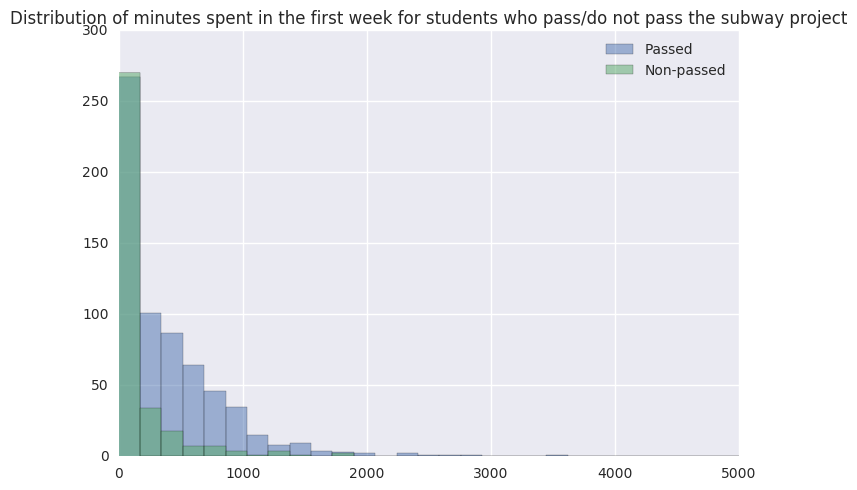

In [128]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import matplotlib.pyplot as plt

bins = np.linspace(0, 5000, 30)

plt.hist(total_minutes_pass.values(), bins, alpha=0.5, label='Passed')
plt.hist(total_minutes_non_pass.values(), bins, alpha=0.5, label='Non-passed')
plt.legend(loc='upper right')
plt.title('Distribution of minutes spent in the first week ' + 
          'for students who pass/do not pass the subway project')
plt.show()

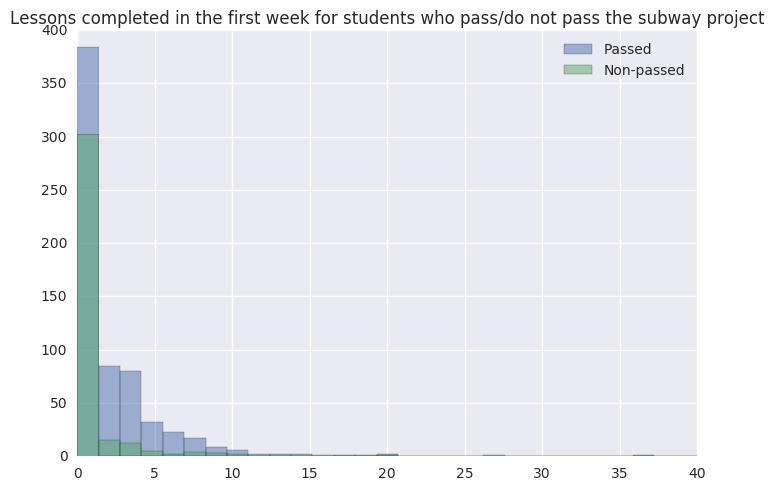

In [130]:
bins = np.linspace(0, 40, 30)

plt.hist(less_completed_pass.values(), bins, alpha=0.5, label='Passed')
plt.hist(less_completed_non_pass.values(), bins, alpha=0.5, label='Non-passed')
plt.legend(loc='upper right')
plt.title('Lessons completed in the first week ' + 
          'for students who pass/do not pass the subway project')
plt.show()

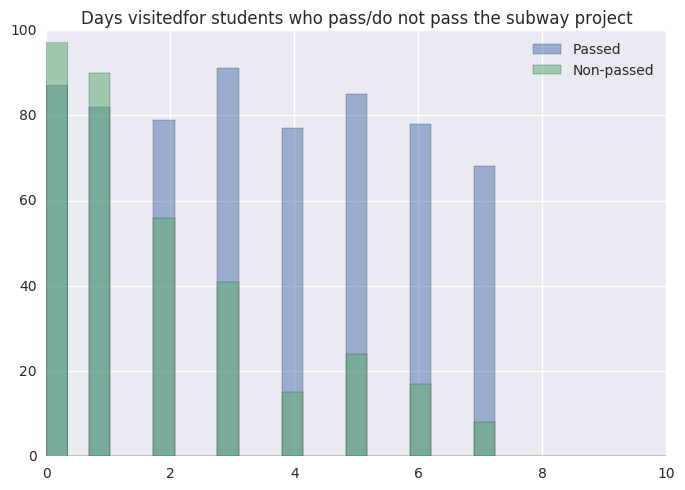

In [132]:
bins = np.linspace(0, 10, 30)
plt.hist(days_visited_pass.values(), bins, alpha=0.5, label='Passed')
plt.hist(days_visited_non_pass.values(), bins, alpha=0.5, label='Non-passed')
plt.legend(loc='upper right')
plt.title('Days visited' + 
          'for students who pass/do not pass the subway project')
plt.show()

## Improving Plots and Sharing Findings

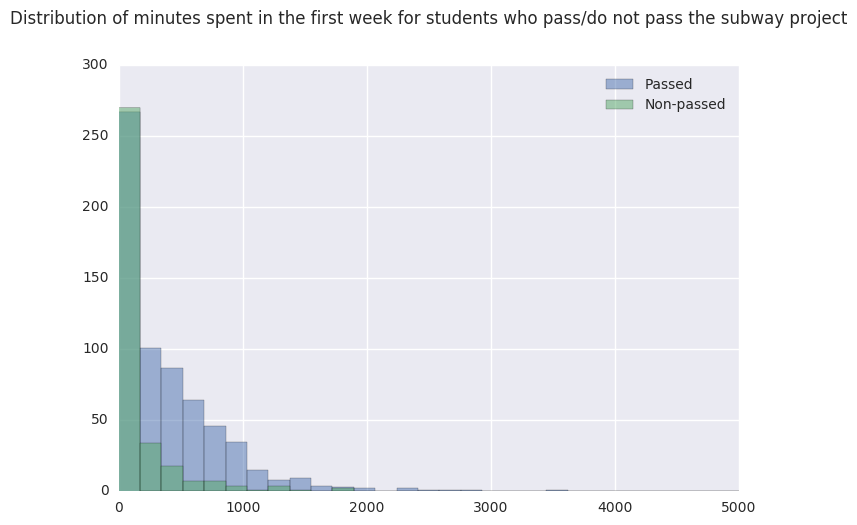

In [135]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.


import seaborn as sns

"""plt.hist(total_minutes_pass.values(), bins=8, )
plt.xlabel('Minutes')
plt.title('Distribution of minutes spent in the first week ' + 
          'for students who do not pass the subway project')
plt.show()
plt.hist(total_minutes_non_pass.values(), bins=8)
plt.xlabel('Minutes')
plt.title('Distribution of minutes spent in the first week ' + 
          'for students who pass the subway project')

plt.show()
"""
bins = np.linspace(0, 5000, 30)
plt.hist(total_minutes_pass.values(), bins, alpha=0.5, label='Passed')
plt.hist(total_minutes_non_pass.values(), bins, alpha=0.5, label='Non-passed')
plt.legend(loc='upper right')
plt.title('Distribution of minutes spent in the first week ' + 
          'for students who pass/do not pass the subway project', y = 1.08)
plt.show()

In [115]:
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [116]:
ridership[1:3,3:5]

array([[2328, 2539],
       [6461, 2691]])